# Financial Data Model using Random Forest

### Importing packages and modules require for exploratory and model building

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_selection import RFECV,RFE
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn import preprocessing

In [3]:
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\Ravi Singh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ravi Singh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
data = pd.read_csv('application_train.csv')

In [5]:
test_data = pd.read_csv('application_test.csv')

In [6]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257512 entries, 0 to 257511
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 239.7+ MB


In [8]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,257512.000000,257512.000000,257512.000000,2.575120e+05,2.575120e+05,257501.000000,2.572720e+05,257512.000000,257512.000000,257512.000000,...,257512.000000,257512.000000,257512.000000,257512.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000
mean,307143.115397,0.080769,0.416509,1.684155e+05,5.988950e+05,27108.806240,5.382673e+05,0.020882,-16039.898366,63930.692845,...,0.008058,0.000575,0.000505,0.000326,0.006268,0.006901,0.034747,0.266833,0.266348,1.903653
std,86047.050997,0.272481,0.721749,1.105872e+05,4.025061e+05,14480.289657,3.693680e+05,0.013845,4364.493540,141368.981432,...,0.089403,0.023967,0.022463,0.018058,0.083078,0.111287,0.206680,0.913544,0.825488,1.870100
min,157876.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,232638.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16542.000000,2.385000e+05,0.010006,-19689.000000,-2756.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,307140.500000,0.000000,0.000000,1.476000e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15753.000000,-1212.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,381476.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12420.000000,-288.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.800009e+07,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,22.000000


In [10]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,157876,0,Cash loans,F,N,Y,0,67500.0,343800.0,16155.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,157878,0,Cash loans,M,Y,N,2,247500.0,945000.0,40167.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,157879,0,Revolving loans,M,N,Y,2,180000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,157880,0,Cash loans,F,N,Y,0,112500.0,295168.5,16011.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,157881,0,Cash loans,F,N,Y,0,63000.0,298512.0,17266.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data[data['SK_ID_CURR'].duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


### Dropping ID variable as it doesnt have much predictive power in it.

In [12]:
data.drop('SK_ID_CURR', axis=1, inplace= True)

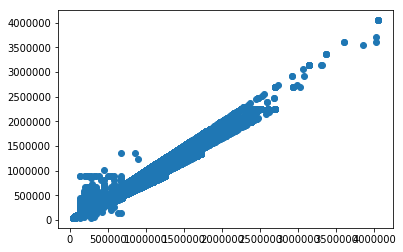

In [13]:
plt.scatter(data['AMT_CREDIT'],data['AMT_GOODS_PRICE'])

In [14]:
data.drop('AMT_GOODS_PRICE', inplace= True, axis=1)

In [15]:
data.drop('DAYS_LAST_PHONE_CHANGE', inplace= True, axis=1)

### Extracting numerical data from dataframe so that we can analyise and impute missing information

In [16]:
numerical_data = data._get_numeric_data().columns

In [17]:
numerical_data

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=103)

In [18]:
cat = preprocessing.LabelEncoder()
data['ORGANIZATION_TYPE'] = cat.fit_transform(data['ORGANIZATION_TYPE'])

In [19]:
data[numerical_data].head(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,67500.0,343800.0,16155.0,0.015221,-19421,-826,-293.0,-2651,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,2,247500.0,945000.0,40167.0,0.019101,-15322,365243,-7733.0,-4788,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,0,2,180000.0,540000.0,27000.0,0.006207,-11120,-61,-953.0,-3474,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,0,0,112500.0,295168.5,16011.0,0.030755,-11824,-4467,-1193.0,-2370,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,0,0,63000.0,298512.0,17266.5,0.018029,-22102,365243,-2536.0,-4052,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# data[numerical_data].ix[:,0]

In [21]:
#plt.hist(data[numerical_data].iloc[:,3])

In [22]:
data[numerical_data][data[numerical_data].iloc[:,2]< 1000]

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [23]:
# columns to drop = ['SK_ID_CURR',]
# discrete_variable = ['']
# continous_variables = ['CNT_CHILDREN','AMT_INCOME_TOTAL']

### Further dividing columns into categorical and numerical if the count is less than 20. 

In [24]:
columns = list(data[numerical_data])

In [25]:
# dividing dataset into categorical and numerical columns
categorical = []
numerical = []

for i in columns:
    count = data[i].nunique()
    if count < 8:
        categorical.append(i)
    else:
        numerical.append(i)

In [26]:
test_data[numerical].isnull().sum()

CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         1
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32950
CNT_FAM_MEMBERS                     1
HOUR_APPR_PROCESS_START             0
EXT_SOURCE_1                    28172
EXT_SOURCE_2                      126
EXT_SOURCE_3                     9944
APARTMENTS_AVG                  25385
BASEMENTAREA_AVG                29199
YEARS_BEGINEXPLUATATION_AVG     24394
YEARS_BUILD_AVG                 33239
COMMONAREA_AVG                  34960
ELEVATORS_AVG                   26651
ENTRANCES_AVG                   25195
FLOORSMAX_AVG                   24875
FLOORSMIN_AVG                   33894
LANDAREA_AVG                    29721
LIVINGAPARTMENTS_AVG            34226
LIVINGAREA_A

### Removing columns containing missing values greater than 10 percent

In [27]:
columns_to_keep = []
columns_to_drop = []
for i in numerical:
    percentage = (data[i].isnull().sum()/257511)*100
    if percentage < 10.0:
        columns_to_keep.append(i)
    else:
        columns_to_drop.append(i)

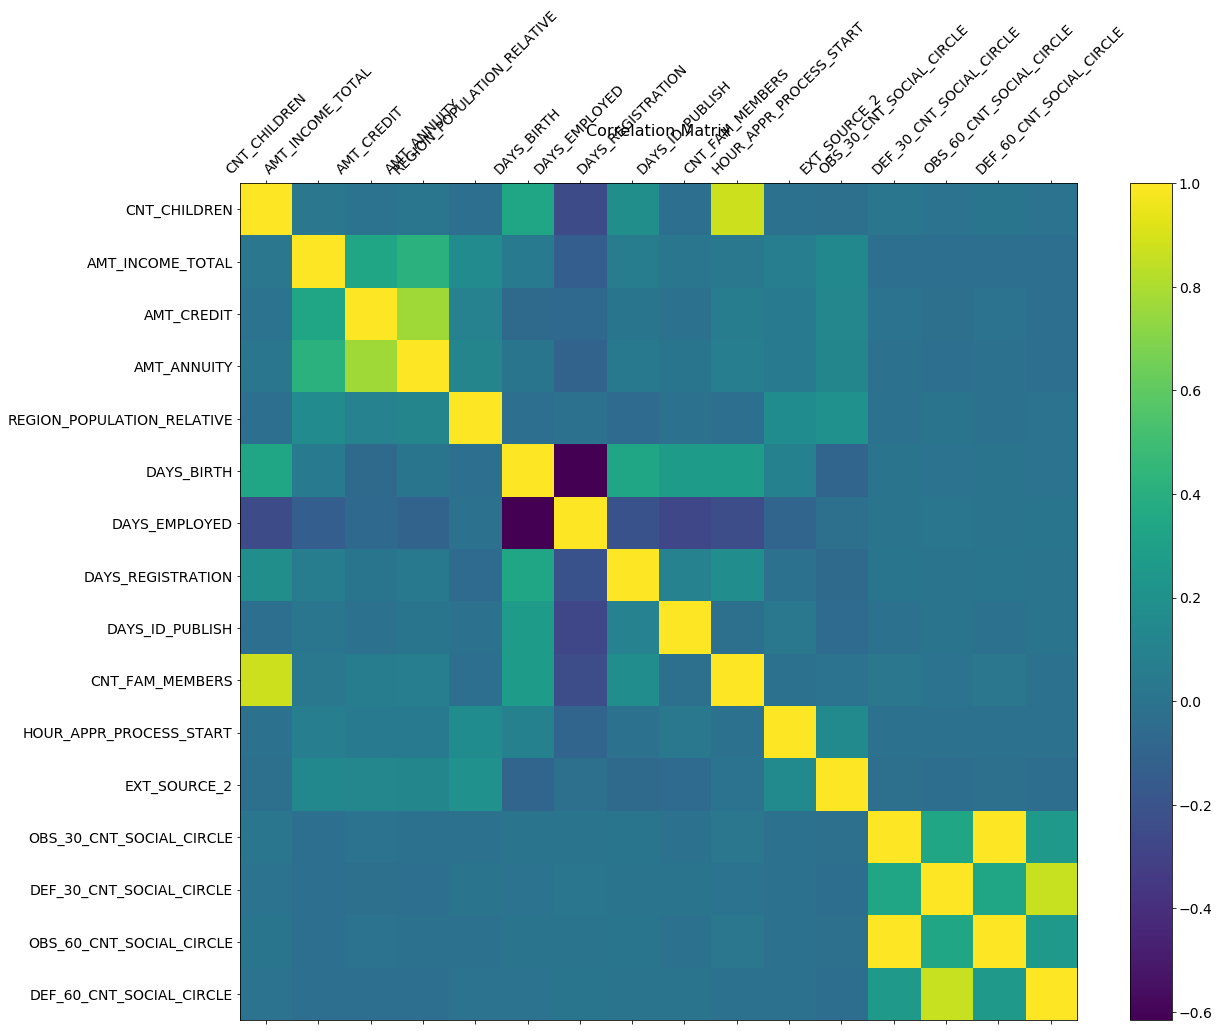

In [28]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data[columns_to_keep].corr(), fignum=f.number)
plt.xticks(range(data[columns_to_keep].shape[1]), data[columns_to_keep].columns, fontsize=14, rotation=45)
plt.yticks(range(data[columns_to_keep].shape[1]), data[columns_to_keep].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [29]:
data['DAYS_BIRTH'] = round(data['DAYS_BIRTH']/-365).astype('int')


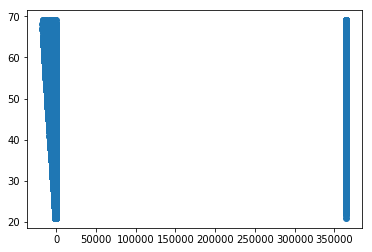

In [30]:
plt.scatter(data['DAYS_EMPLOYED'],data['DAYS_BIRTH'])

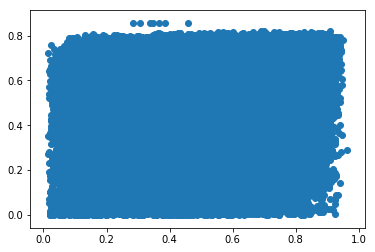

In [31]:
plt.scatter(data['EXT_SOURCE_1'],data['EXT_SOURCE_2'])

In [32]:
data['EXT_SOURCE_1'].isna().sum()

145206

In [33]:
days_employ = []
for i in range(len(data)):
    if data['DAYS_EMPLOYED'][i] < 0:
        days_employ.append(-data['DAYS_EMPLOYED'][i])
    else:
        days_employ.append(data['DAYS_EMPLOYED'][i])
    

In [34]:
data['DAYS_EMPLOYED'] = days_employ

### To check null values in every column so that we take appropriate action 

In [35]:
data[columns_to_keep].isnull().sum()

CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    11
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
CNT_FAM_MEMBERS                 1
HOUR_APPR_PROCESS_START         0
EXT_SOURCE_2                  534
OBS_30_CNT_SOCIAL_CIRCLE      853
DEF_30_CNT_SOCIAL_CIRCLE      853
OBS_60_CNT_SOCIAL_CIRCLE      853
DEF_60_CNT_SOCIAL_CIRCLE      853
dtype: int64

In [36]:
data.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    222727.000000
mean          1.903653
std           1.870100
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          22.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2ed8ec8a278>,
 'caps': [<matplotlib.lines.Line2D at 0x2ed8ec8ab38>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ed8ec8a128>],
 'medians': [<matplotlib.lines.Line2D at 0x2ed8ec963c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ed8ec967f0>],
 'means': []}

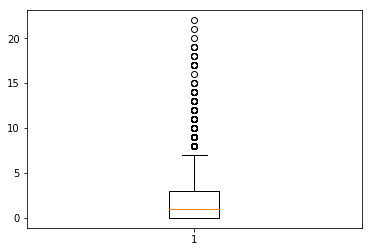

In [37]:
plt.boxplot(data.AMT_REQ_CREDIT_BUREAU_YEAR.dropna())

(array([1.55051e+05, 4.55740e+04, 1.60380e+04, 5.02500e+03, 9.41000e+02,
        6.60000e+01, 1.30000e+01, 8.00000e+00, 8.00000e+00, 3.00000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

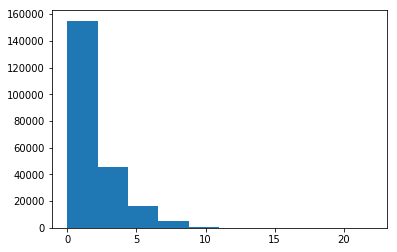

In [38]:
plt.hist(data['AMT_REQ_CREDIT_BUREAU_YEAR'].dropna())

In [39]:
data.AMT_REQ_CREDIT_BUREAU_YEAR.unique()

array([ 1.,  2.,  3., nan,  0.,  4.,  5.,  7.,  8.,  6.,  9., 12., 14.,
       10., 16., 13., 11., 22., 17., 19., 18., 21., 15., 20.])

### Based on distribution values are imputed accordingly. (More research could be done on this.) 

In [40]:
data['AMT_ANNUITY'].fillna(value=data['AMT_ANNUITY'].median(), inplace= True )
data['EXT_SOURCE_2'].fillna(value=data['EXT_SOURCE_2'].median(), inplace= True )
data['CNT_FAM_MEMBERS'].fillna(value=data['CNT_FAM_MEMBERS'].median(), inplace= True )
data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=data['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace= True )
data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=data['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace= True )
data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=data['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace= True )
data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=data['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace= True )


In [41]:
# data.dropna(axis=0, how='any', subset=['AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE',
#                                       'OBS_60_CNT_SOCIAL_CIRCLE'], inplace= True)

In [42]:
data[columns_to_keep].isnull().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
CNT_FAM_MEMBERS               0
HOUR_APPR_PROCESS_START       0
EXT_SOURCE_2                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
dtype: int64

## Handling Categorical variables

In [43]:
categorical_columns  = list(set(data.columns)- set(numerical_data))

In [44]:
data[categorical_columns].head()

,NAME_TYPE_SUITE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,FONDKAPREMONT_MODE,HOUSETYPE_MODE,NAME_INCOME_TYPE,FLAG_OWN_CAR,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,ORGANIZATION_TYPE,CODE_GENDER,NAME_CONTRACT_TYPE,EMERGENCYSTATE_MODE,WALLSMATERIAL_MODE
0,Unaccompanied,Y,House / apartment,TUESDAY,NaN,NaN,State servant,N,Medicine staff,Secondary / secondary special,Married,30,F,Cash loans,NaN,NaN
1,Unaccompanied,N,House / apartment,WEDNESDAY,NaN,NaN,Pensioner,Y,NaN,Secondary / secondary special,Married,57,M,Cash loans,NaN,NaN
2,Unaccompanied,Y,House / apartment,SATURDAY,NaN,NaN,Working,N,Sales staff,Secondary / secondary special,Married,5,M,Revolving loans,No,"Stone, brick"
3,Unaccompanied,Y,House / apartment,SUNDAY,org spec account,block of flats,Working,N,Laborers,Higher education,Married,4,F,Cash loans,No,Mixed
4,Unaccompanied,Y,Municipal apartment,THURSDAY,NaN,NaN,Pensioner,N,NaN,Secondary / secondary special,Civil marriage,57,F,Cash loans,NaN,NaN


In [45]:
lst = []
for i in range(len(categorical_columns)):
    lst.append(data[categorical_columns].iloc[:,i].value_counts())

In [46]:
categorical_combined = categorical+ categorical_columns

#data[categorical_columns].isnull().sum()

In [47]:
categorical_combined.remove('TARGET')

In [48]:
cat_columns_to_keep = []
cat_columns_to_drop = []
for i in categorical_combined:
    percentage = (data[i].isnull().sum()/257511)*100
    if percentage < 10.0:
        cat_columns_to_keep.append(i)
    else:
        cat_columns_to_drop.append(i)

In [49]:
fill_missing_values = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                       'AMT_REQ_CREDIT_BUREAU_QRT','NAME_TYPE_SUITE']

# for i in range(len(fill_missing_values)):
#     print(data[fill_missing_values].iloc[:,i].value_counts())

In [50]:
data[cat_columns_to_drop].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR     34785
FONDKAPREMONT_MODE            176104
HOUSETYPE_MODE                129222
OCCUPATION_TYPE                80737
EMERGENCYSTATE_MODE           122057
WALLSMATERIAL_MODE            130882
dtype: int64

In [51]:
cat_data = pd.get_dummies(data[cat_columns_to_keep].drop('NAME_TYPE_SUITE',axis=1), drop_first=True)

In [52]:
fill_data = pd.concat([cat_data,data[columns_to_keep]],axis=1)

In [53]:
fill_data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE']

In [54]:
x_train = fill_data[fill_data['NAME_TYPE_SUITE'].notnull()].drop('NAME_TYPE_SUITE',axis=1)
y_train = fill_data[fill_data['NAME_TYPE_SUITE'].notnull()]['NAME_TYPE_SUITE']
x_test =  fill_data[fill_data['NAME_TYPE_SUITE'].isnull()].drop('NAME_TYPE_SUITE',axis=1)
y_test = fill_data[fill_data['NAME_TYPE_SUITE'].isnull()]['NAME_TYPE_SUITE']

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OutputCodeClassifier, OneVsRestClassifier
from sklearn.svm import LinearSVC

In [56]:
clf = OneVsRestClassifier(LinearSVC(random_state=0))
clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [57]:
name_type = clf.predict(x_test)

In [68]:
y_test= pd.Series(name_type)

In [66]:
fill_new = pd.concat([x_train,x_test], ignore_index=True)

In [69]:
fill_y = pd.concat([y_train,y_test], ignore_index= True)

In [78]:
fill_y = pd.DataFrame({'NAME_TYPE_SUITE': fill_y})

In [79]:
fill_data = pd.concat([fill_new, fill_y], axis =1)

In [80]:
fill_data.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,...,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_TYPE_SUITE
0,1,1,1,1,1,0,2,2,0,0,...,-293.0,-2651,2.0,14,0.583251,4.0,1.0,4.0,1.0,Unaccompanied
1,1,0,0,1,0,0,2,2,0,0,...,-7733.0,-4788,4.0,16,0.623227,2.0,2.0,2.0,2.0,Unaccompanied
2,1,1,0,1,1,0,2,2,0,1,...,-953.0,-3474,4.0,13,0.430050,0.0,0.0,0.0,0.0,Unaccompanied
3,1,1,1,1,0,0,2,2,0,0,...,-1193.0,-2370,2.0,14,0.447755,0.0,0.0,0.0,0.0,Unaccompanied
4,1,0,0,1,0,0,3,3,0,0,...,-2536.0,-4052,2.0,4,0.235905,1.0,0.0,1.0,0.0,Unaccompanied


In [81]:
data['NAME_TYPE_SUITE'] = fill_data['NAME_TYPE_SUITE']

In [82]:
data['NAME_TYPE_SUITE'].isna().sum()

0

In [83]:
data.reset_index(inplace=True)

In [84]:
data.drop('index',axis=1, inplace = True)

In [85]:
target= data.TARGET
data.drop('TARGET',axis=1, inplace=True)

In [86]:
data_cat = pd.get_dummies(data[cat_columns_to_keep], drop_first=True)

In [87]:
#data_cat.columns

In [88]:
#data[columns_to_keep].count()

In [89]:
new_data = pd.concat([data_cat,data[columns_to_keep]],axis=1)

In [90]:
new_data.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,...,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,1,1,1,1,1,0,2,2,0,0,...,826,-293.0,-2651,2.0,14,0.583251,4.0,1.0,4.0,1.0
1,1,0,0,1,0,0,2,2,0,0,...,365243,-7733.0,-4788,4.0,16,0.623227,2.0,2.0,2.0,2.0
2,1,1,0,1,1,0,2,2,0,1,...,61,-953.0,-3474,4.0,13,0.430050,0.0,0.0,0.0,0.0
3,1,1,1,1,0,0,2,2,0,0,...,4467,-1193.0,-2370,2.0,14,0.447755,0.0,0.0,0.0,0.0
4,1,0,0,1,0,0,3,3,0,0,...,365243,-2536.0,-4052,2.0,4,0.235905,1.0,0.0,1.0,0.0


In [ ]:
#target.value_counts()

In [ ]:
#target = pd.DataFrame({'target':new_data.TARGET})

### Test Data has been under gone same process as training data so that structure of data matches. 

In [91]:
test_data[columns_to_keep].isnull().sum()

CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     1
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
CNT_FAM_MEMBERS                 1
HOUR_APPR_PROCESS_START         0
EXT_SOURCE_2                  126
OBS_30_CNT_SOCIAL_CIRCLE      168
DEF_30_CNT_SOCIAL_CIRCLE      168
OBS_60_CNT_SOCIAL_CIRCLE      168
DEF_60_CNT_SOCIAL_CIRCLE      168
dtype: int64

In [ ]:
#test_data[cat_columns_to_keep].isna().sum()

In [ ]:
# for i in range(len(test_data[columns_to_keep].index)) :
#     value = test_data[columns_to_keep].iloc[i].isnull().sum()
#     print(value)
#     if value > 2:
#         print("Nan in row ", i , " : " ,  value)

In [92]:
test_data.drop('AMT_GOODS_PRICE', inplace= True, axis=1)
test_data.drop('DAYS_LAST_PHONE_CHANGE', inplace= True, axis=1)

In [93]:
test_data[test_data['DAYS_BIRTH']>0]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [94]:
test_data['DAYS_BIRTH'] = round(test_data['DAYS_BIRTH']/-365).astype('int')

In [95]:
days_employ = []
for i in range(len(test_data)):
    if test_data['DAYS_EMPLOYED'][i] < 0:
        days_employ.append(-test_data['DAYS_EMPLOYED'][i])
    else:
        days_employ.append(test_data['DAYS_EMPLOYED'][i])

In [96]:
test_data['DAYS_EMPLOYED'] = days_employ

In [97]:
test_data['AMT_ANNUITY'].fillna(value = test_data['AMT_ANNUITY'].median(), inplace= True)
test_data['EXT_SOURCE_2'].fillna(value = test_data['EXT_SOURCE_2'].median(), inplace= True)
test_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value = test_data['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
test_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value = test_data['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
test_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value= test_data['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
test_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value = test_data['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
test_data['CNT_FAM_MEMBERS'].fillna(value = test_data['CNT_FAM_MEMBERS'].median(), inplace= True)


In [98]:
cat = preprocessing.LabelEncoder()
test_data['ORGANIZATION_TYPE'] = cat.fit_transform(test_data['ORGANIZATION_TYPE'])

In [99]:
test_data['NAME_TYPE_SUITE'].isna().sum()

192

In [100]:
cat_data = pd.get_dummies(test_data[cat_columns_to_keep].drop('NAME_TYPE_SUITE',axis=1), drop_first=True)

In [101]:
fill_test_data = pd.concat([cat_data,test_data[columns_to_keep]],axis=1)

In [102]:
fill_test_data['NAME_TYPE_SUITE'] = test_data['NAME_TYPE_SUITE']

In [103]:
x_train_1 = fill_test_data[fill_test_data['NAME_TYPE_SUITE'].notnull()].drop('NAME_TYPE_SUITE',axis=1)
y_train_1 = fill_test_data[fill_test_data['NAME_TYPE_SUITE'].notnull()]['NAME_TYPE_SUITE']
x_test_1 =  fill_test_data[fill_test_data['NAME_TYPE_SUITE'].isnull()].drop('NAME_TYPE_SUITE',axis=1)
y_test_1 = fill_test_data[fill_test_data['NAME_TYPE_SUITE'].isnull()]['NAME_TYPE_SUITE']

In [104]:
test_clf = OneVsRestClassifier(LinearSVC(random_state=0))
test_clf.fit(x_train_1,y_train_1)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [105]:
test_name_type = test_clf.predict(x_test_1)

In [106]:
y_test_1= pd.Series(test_name_type)

In [107]:
fill_new_test = pd.concat([x_train_1,x_test_1], ignore_index=True)

In [108]:
fill_y_test = pd.concat([y_train_1,y_test_1], ignore_index= True)

In [109]:
fill_y_test = pd.DataFrame({'NAME_TYPE_SUITE': fill_y_test})

In [110]:
fill_data_test = pd.concat([fill_new_test, fill_y_test], axis =1)

In [111]:
fill_data_test.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,...,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_TYPE_SUITE
0,1,1,0,1,1,0,2,2,0,0,...,-3648,-2120,1.0,10,0.262949,2.0,2.0,2.0,2.0,Unaccompanied
1,1,1,0,1,1,0,1,1,0,0,...,-1186,-291,2.0,11,0.622246,1.0,0.0,1.0,0.0,Family
2,1,1,1,1,1,0,2,2,0,0,...,-4260,-2531,1.0,9,0.555912,0.0,0.0,0.0,0.0,Unaccompanied
3,1,1,0,1,0,0,2,2,0,0,...,-9833,-2437,2.0,17,0.650442,2.0,0.0,2.0,0.0,Unaccompanied
4,1,1,0,1,0,0,2,2,0,0,...,-4311,-3458,1.0,11,0.322738,0.0,0.0,0.0,0.0,Unaccompanied


In [112]:
test_data['NAME_TYPE_SUITE'] = fill_data_test['NAME_TYPE_SUITE']

In [113]:
test_data_cat = pd.get_dummies(test_data[cat_columns_to_keep], drop_first=True)

In [114]:
test_data_total = pd.concat([test_data_cat,test_data[columns_to_keep]],axis=1)

In [115]:
columns_to_keep

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [116]:
target.value_counts()

0    236713
1     20799
Name: TARGET, dtype: int64

## Train Test Split - Machine Learning ALgorithms

In [117]:
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.20, random_state=42)

### Resampling methodolgies - Upsampling and downsampling both process has been applied to minimise the limitations of both method.

In [118]:
from sklearn.utils import resample

In [119]:
X = pd.concat([X_train,y_train], axis =1)

In [120]:
no_loan = X[X.TARGET==0]
loan = X[X.TARGET==1]

In [121]:
loan_upsampled = resample(loan, replace= True, n_samples= round(len(no_loan)/2),random_state= 22)

In [122]:
no_loan_downsample= resample(no_loan, replace= False, n_samples= len(loan_upsampled), random_state= 22)

In [123]:
sampled_data = pd.concat([loan_upsampled, no_loan_downsample],axis =0)

In [124]:
sampled_data.TARGET.value_counts()

1    94656
0    94656
Name: TARGET, dtype: int64

In [125]:
y_train = sampled_data.TARGET
X_train = sampled_data.drop('TARGET', axis=1)

## Grid search method to Fine tune the parameters and to find optimal parameters for our model

In [126]:
param_test1 = {'n_estimators':[500,750, 1000],
               'criterion' :['entropy']}


gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=3)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [500, 750, 1000], 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [127]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.99373, std: 0.00038, params: {'criterion': 'entropy', 'n_estimators': 500},
  mean: 0.99370, std: 0.00037, params: {'criterion': 'entropy', 'n_estimators': 750},
  mean: 0.99369, std: 0.00043, params: {'criterion': 'entropy', 'n_estimators': 1000}],
 {'criterion': 'entropy', 'n_estimators': 500},
 0.9937292338818724)

### Random Forest has been used as a default model aa it can handle correlation and variance & bias issues. It is one of the state of the art algorithm.

#### First we used Random Forest to find top variables so that we can do variable selection and reduce the complexity of the model. To understand the effects of variables on the dataset and to the business sense.  

In [128]:
rf = RandomForestClassifier(n_estimators=500, criterion = 'entropy')

In [129]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [130]:
y_pred_prob = rf.predict_proba(X_test)

In [131]:
y_pred = rf.predict(X_test)

In [132]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
recall = tp / (tp + fn)
prec = tp / (tp + fp)
F1 = 2 * recall * prec / (recall + prec)
print(recall, prec, F1)

0.06339917093391856 0.3341902313624679 0.10657921705267473


In [133]:
confusion_matrix(y_test, y_pred)

array([[46884,   518],
       [ 3841,   260]], dtype=int64)

0.7009182440248829


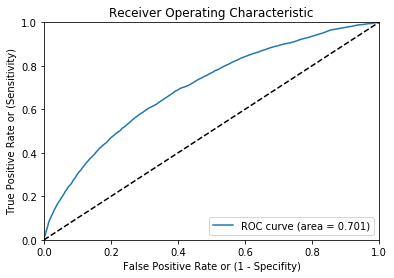

In [134]:
pred_prob = rf.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,pred_prob[:,1])
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

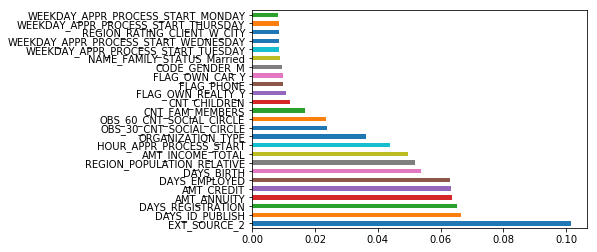

In [135]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(25).plot(kind='barh')

In [152]:
top_20_var = list(feat_importances.nlargest(20).index)

### The model has been built for prediction using Random Forest 

In [153]:
rf = RandomForestClassifier(n_estimators=750, criterion = 'entropy')

In [154]:
rf.fit(X_train[top_20_var],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
y_pred = rf.predict(X_test[top_20_var])

In [156]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
recall = tp / (tp + fn)
prec = tp / (tp + fp)
F1 = 2 * recall * prec / (recall + prec)
print(recall, prec, F1)

0.08436966593513777 0.3148316651501365 0.13307692307692306


In [157]:
confusion_matrix(y_test, y_pred)

array([[46649,   753],
       [ 3755,   346]], dtype=int64)

0.693298938419399


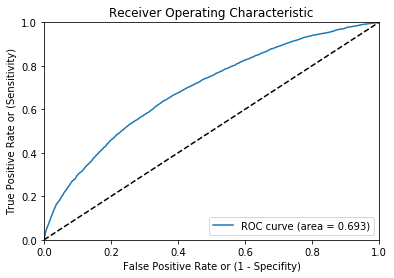

In [158]:
pred_prob = rf.predict_proba(X_test[top_20_var])
fpr, tpr, threshold = metrics.roc_curve(y_test,pred_prob[:,1])
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [143]:
from sklearn.feature_selection import RFECV,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.cross_validation import train_test_split


### RFE method for feature selection 

In [144]:
logreg = LogisticRegression()
rfe = RFE(logreg, step=1, n_features_to_select=25)
rfe = rfe.fit(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [256412, 189312]

In [ ]:
features_bool = np.array(rfe.support_)
features = np.array(data.columns)
result = features[features_bool]
print(result)

### Select K best feature selection method

In [ ]:
# Perform feature selection
selector = SelectKBest(chi2, k=25)
selector = selector.fit(x_train,y_train)
selector.pvalues_.shape
selector.pvalues_[selector.get_support(1)]

In [ ]:
feature = selector.get_support(1)
df.columns[selector.get_support(1)]

In [ ]:
#plotting top 25 value to see the importance of each variable
scores = -np.log10(selector.pvalues_[selector.get_support(1)])


plt.bar(range(len(data.columns[selector.get_support(1)])), scores)
plt.xticks(range(len(data.columns[selector.get_support(1)])), data.columns[selector.get_support(1)], rotation='vertical')
plt.show()

In [ ]:
### Test Data ###

In [ ]:
test_data_total[top_22_var].head()

In [ ]:
test_data_total[top_22_var].isnull().sum()

## Test Data prediction  

In [159]:
y_pred = rf.predict(test_data_total[top_20_var])

In [160]:
import numpy as np

In [161]:
unique, counts = np.unique(y_pred, return_counts=True)

In [162]:
print(unique,counts)

[0 1] [48949  1050]


In [163]:
submission = pd.DataFrame()

In [164]:
submission['SK_ID_CURR'] = test_data['SK_ID_CURR']
submission['TARGET'] = y_pred

In [165]:
submission.to_csv("sample_submission_1.csv", index=False)